## IMPORT DATA AND WRANGLING

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# format the dataset

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
df.shape

(145460, 23)

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(145460, 23)

## Column Definitions
According to the author of the Kaggle dataset and the ["Notes to accompany Daily Weather Observations"](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml) published by the Australian Bureau of Meteorology, the meanings and units for each of the columns in the dataset are as follows:

| **Column Name** | **Definition** | **Units** |
| --------------- | -------------- | --------- |
| `Date` | Date of the observation | N/A |
| `Location` | Location of the weather station | N/A |
| `MinTemp` | Minimum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree | Degrees Celsius |
| `MaxTemp` | Maximum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree | Degrees Celsius |
| `Rainfall` | Precipitation (rainfall) in the 24 hours to 9am. Sometimes only known to the nearest whole millimeter | Millimeters |
| `Evaporation` | "Class A" pan evaporation in the 24 hours to 9am | Millimeters |
| `Sunshine` | Bright sunshine in the 24 hours to midnight | Hours |
| `WindGustDir` | Direction of the strongest wind gust in the 24 hours to midnight | 16 compass points |
| `WindGustSpeed` | Speed of the strongest wind gust in the 24 hours to midnight | Kilometers per hour |
| `WindDir9am` | Direction of the wind at 9am | 16 compass points |
| `WindDir3pm` | Direction of the wind at 3pm | 16 compass points |
| `WindSpeed9am` | Speed of the wind at 9am | Kilometers per hour |
| `WindSpeed3pm` | Speed of the wind at 3pm | Kilometers per hour |
| `Humidity9am` | Relative humidity at 9am | Percent |
| `Humidity3pm` | Relative humidity at 3pm | Percent |
| `Pressure9am` | Atmospheric pressure reduced to mean sea level at 9am | Hectopascals |
| `Pressure3pm` | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascals |
| `Cloud9am` | Fraction of sky obscured by cloud at 9am | Eighths |
| `Cloud3pm` | Fraction of sky obscured by cloud at 3pm | Eighths |
| `Temp9am` | Temparature at 9am | Degrees Celsius |
| `Temp3pm` | Temparature at 3am | Degrees Celsius |
| `RainToday` | Did the current day receive precipitation exceeding 1mm in the 24 hours to 9am | Binary (0 = No, 1 = Yes) |
| `RainTomorrow` | Did the next day receive precipitation exceeding 1mm in the 24 hours to 9am | Binary (0 = No, 1 = Yes) |

In [8]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Tasks

__EDA__
- Data review
- Column definition
- Summarize info and stats (observations)
- Histograms
- Raining day by location
- Seasonality
- correlation matrix
  

__Data preprocessing__
- Missing values
    - continuous features
    - categorical features
- concatenating the final dataframe
- extracting the month
- dummy variables

__Model Development__

### Data Wrangling

In [9]:
df.isna().sum()/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

The largest missing values are appeared in Evaporation, Sunshine, Cloud9am, Cloud3pm columns, contributed around 40% of their total values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

The date column need to be converted to correct data type: Date

In [11]:
df.describe() # look for any outliers

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


The rainfall column has the mean is ~ 2.3 mm, minimum value is 0, where the max value is 371 mm showing the significant difference between 2 values, this might be caused by the missing value in the datasets

In [12]:
df.describe(include = 'object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


- Replace `No/Yes` in `RainToday` `Raintomorrow` column to `0/1`

In [13]:
df['RainToday'] = df['RainToday'].replace(['No','Yes'],[0,1], regex= True)

/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_54813/2351573413.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace(['No','Yes'],[0,1], regex= True)


In [14]:
df['RainTomorrow'] = df['RainTomorrow'].replace(['No','Yes'],[0,1], regex= True)

/var/folders/5v/wc8gxzt56gx00tb3h88t55vm0000gn/T/ipykernel_54813/867034195.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainTomorrow'] = df['RainTomorrow'].replace(['No','Yes'],[0,1], regex= True)


In [15]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


__EDA using histograms__

In [16]:
df_numeric = df.select_dtypes(exclude=['object'])

Text(0.5, 1.0, 'Histograms of Features')

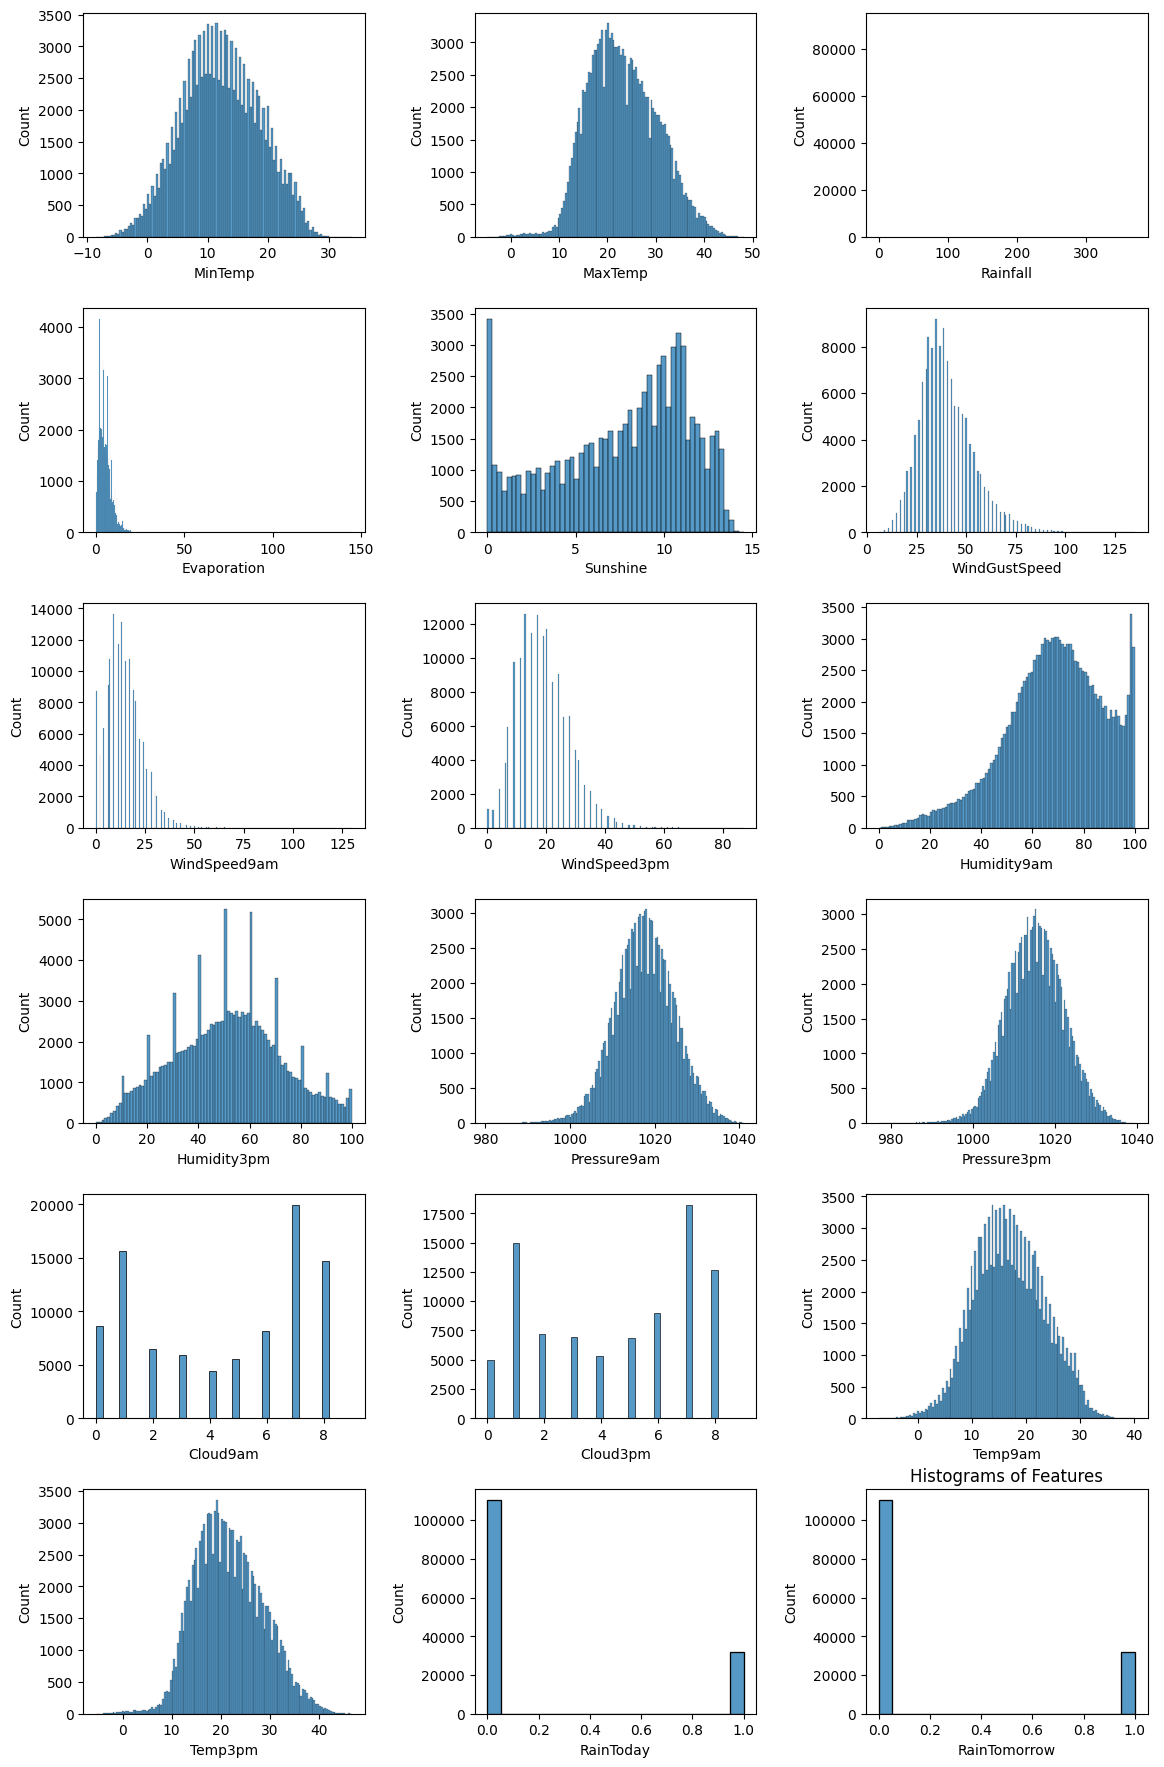

In [17]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize =(12,18))
axes = axes.reshape(-1)

for i, col in enumerate(df_numeric):
    sns.histplot(df[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histograms of Features')

Most of the features if __normally distributed__ showing in the plot. Due to the small value and > 75% percentile is at 0.8, the `Rainfall` column cannot display the plot clearly.

Display the `Rainfall` distribution seperately with smaller size of `xlim`

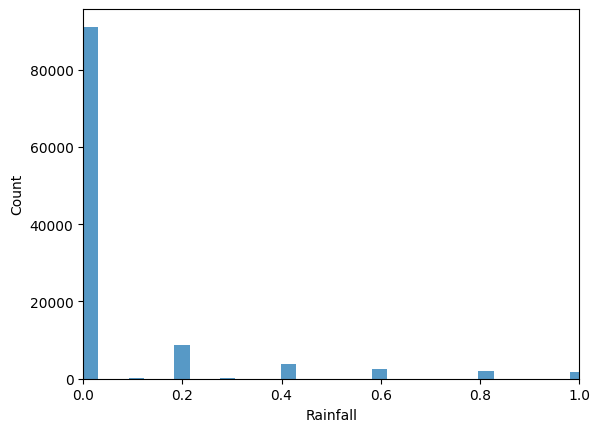

In [18]:
sns.histplot(df['Rainfall'])
plt.xlim(0,1);

- Rain distribution of geography

In [19]:
df_rain = df[df['RainToday'] == 1].groupby(df['Location']).count()

In [20]:
df_rain = df_rain['Location']

In [21]:
df_rain = df_rain.to_frame()

In [22]:
df_rain.columns.values[0] = 'RainDay'

In [23]:
df_rain.index

Index(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura',
       'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil',
       'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith',
       'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums',
       'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru',
       'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe',
       'Wollongong', 'Woomera'],
      dtype='object', name='Location')

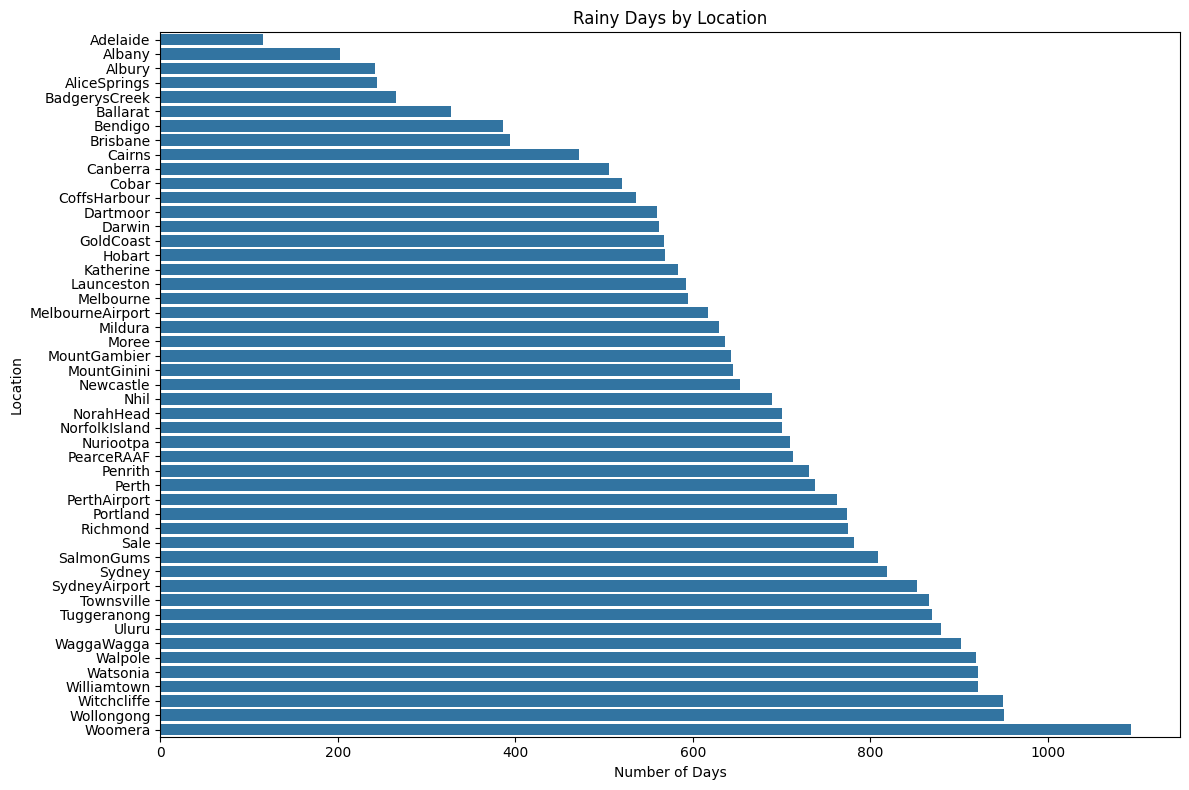

In [24]:
# plot the output

plt.figure(figsize=(12, 8))
sns.barplot(x= 'RainDay', y = df_rain.index, data = df_rain.sort_values('RainDay'))
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout()

- Season Distribution

In [25]:
df.Date = pd.to_datetime(df.Date)

In [26]:
df['Month'] = df['Date'].dt.month

In [27]:
df_season = df[df['RainToday'] == 1].groupby(df['Month']).count()
df_season = df_season['Month']
df_season = df_season.to_frame()
df_season.columns.values[0] = 'RainDay'

In [28]:
df_season.head()

,RainDay
Month,
1,2447
2,2176
3,2831
4,2451
5,2901


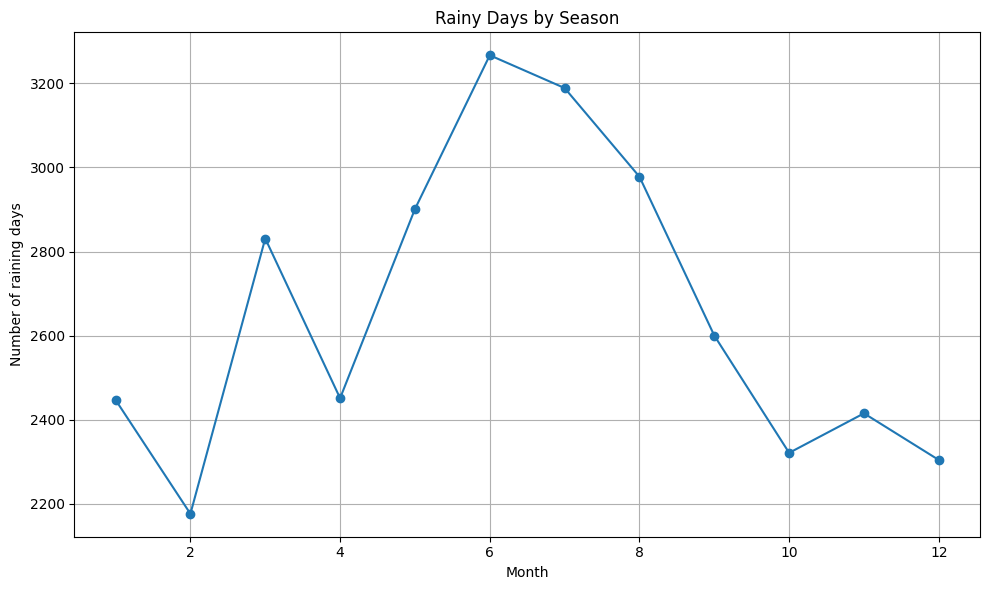

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df_season.index, df_season.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of raining days')
plt.title('Rainy Days by Season')
plt.tight_layout()
plt.grid(True)

The lowest raining month is February which is also during summer - the lowest raining season. It starts increasing in March, and reaches the highest amount in winter ( June to August), then drops gruadually in the following months till the end of the year.

- Heatmap

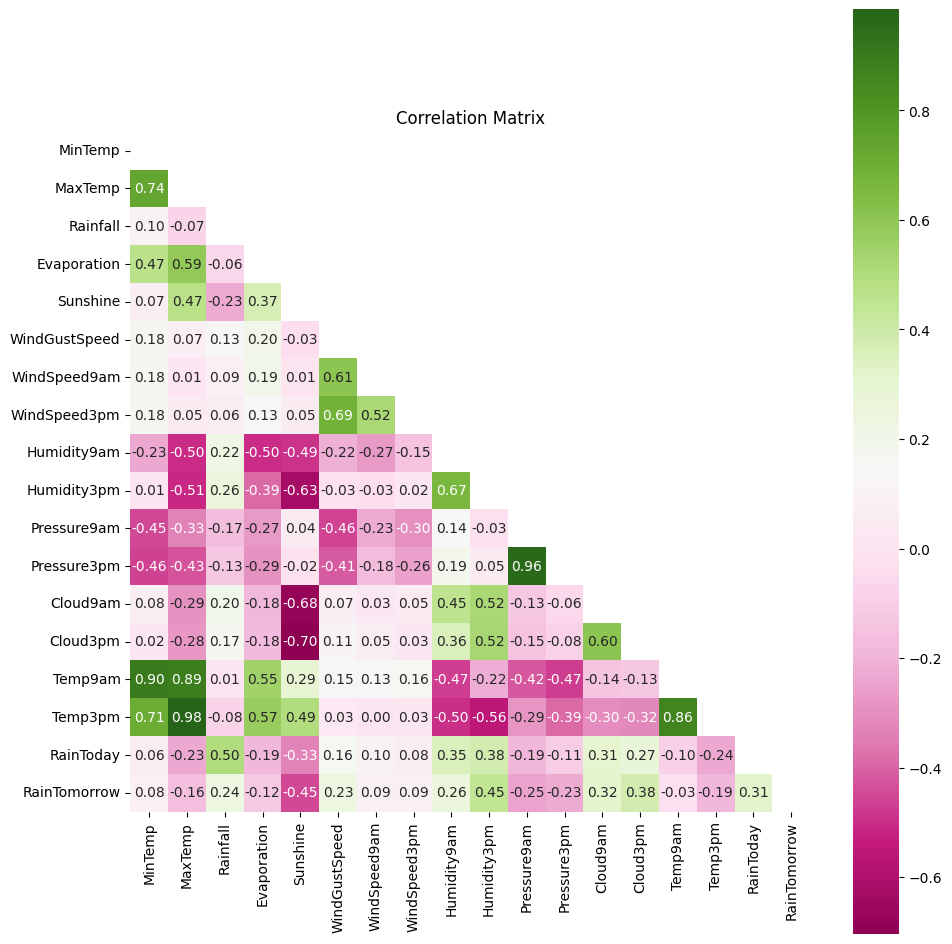

In [30]:
plt.figure(figsize = (10, 10))

mask = np.triu(np.ones_like(df_numeric.corr()))
sns.heatmap(df_numeric.corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap='PiYG')
plt.title('Correlation Matrix')
plt.tight_layout()

Min Temparature, max temperature, have the high correlation with Temperature at 9am, 3pm, and also relate to the feature Evaporation. These correlation is obviously and there is no more insight from this corelation matrix for the dataset. 

DATA PREPOCESSING 

- Handling missing values

Using `IterativeImputer` to handle missing numeric values 

In [31]:
df_imp = df_numeric.dropna(axis = 0 , subset = ['RainTomorrow'])

In [32]:
cont_feats = [col for col in df_imp.columns]
cont_feats.remove('RainTomorrow')
cont_feats

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [33]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(random_state=42)
df_impcon = imp.fit_transform(df_imp[cont_feats])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [34]:
df_num = pd.DataFrame(df_impcon, columns=cont_feats)

In [35]:
df_num.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.103048,16.9,21.8,0.0
1,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.912027,2.640581,17.2,24.3,0.0
2,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.014404,2.000000,21.0,23.2,0.0
3,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.201990,1.993914,18.1,26.5,0.0
4,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [36]:
df_num.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

Handing missing categorical values

In [37]:
df1 = df.dropna(axis = 0, subset='RainTomorrow')

In [38]:
df_cat = df1.select_dtypes('object')

In [39]:
df_cat.isna().sum()

Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
dtype: int64

In [40]:
cat_feats = [col for col in df_cat.columns]

# Also removing Date and Location since no values are missing
cat_feats.remove('Location')
cat_feats

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [41]:
df_imputed_cat = df1[cat_feats]
df_imputed = df_imputed_cat.copy()

for col in df_imputed_cat.columns:
    # Get the unique values using value_counts()
    values = df_imputed_cat[col].value_counts().index  # Access first column by index
    probs = df_imputed_cat[col].value_counts(normalize=True).values
    df_imputed[col] = df_imputed_cat[col].replace(np.nan, np.random.choice(a=values, p=probs))


df_imputed.head()

,WindGustDir,WindDir9am,WindDir3pm
0,W,W,WNW
1,WNW,NNW,WSW
2,WSW,W,WSW
3,NE,SE,E
4,W,ENE,NW


In [42]:
df_imputed.isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

In [43]:
# Concat to df_final 
print(df1.shape)
print(df_imputed.shape)
print(df_num.shape)

(142193, 24)
(142193, 3)
(142193, 17)


- Use `LabelEncoder` to encode object datatype

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
lb = LabelEncoder()

In [47]:
df_cat1 = pd.concat(objs=[df_imputed.reset_index(drop=True), df1['Location'].reset_index(drop=True)], axis=1)

In [48]:
for col in df_cat1.columns:
    df_cat1[col] = lb.fit_transform(df_cat1[col])
    print(df_cat1.head())

   WindGustDir WindDir9am WindDir3pm Location
0           13          W        WNW   Albury
1           14        NNW        WSW   Albury
2           15          W        WSW   Albury
3            4         SE          E   Albury
4           13        ENE         NW   Albury
   WindGustDir  WindDir9am WindDir3pm Location
0           13          13        WNW   Albury
1           14           6        WSW   Albury
2           15          13        WSW   Albury
3            4           9          E   Albury
4           13           1         NW   Albury
   WindGustDir  WindDir9am  WindDir3pm Location
0           13          13          14   Albury
1           14           6          15   Albury
2           15          13          15   Albury
3            4           9           0   Albury
4           13           1           7   Albury
   WindGustDir  WindDir9am  WindDir3pm  Location
0           13          13          14         2
1           14           6          15         2
2      

In [49]:
df_final = pd.concat(objs=[ df_num.reset_index(drop=True),df_cat1.reset_index(drop=True), df1[['Month','RainTomorrow']].reset_index(drop=True)], axis=1)

In [50]:
df_final.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
Location         0
Month            0
RainTomorrow     0
dtype: int64

In [51]:
df_final.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,Location,Month,RainTomorrow
0,13.4,22.9,0.6,6.497888,7.048211,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.103048,16.9,21.8,0.0,13,13,14,2,12,0.0
1,7.4,25.1,0.0,6.270412,10.863393,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.912027,2.640581,17.2,24.3,0.0,14,6,15,2,12,0.0
2,12.9,25.7,0.0,8.659380,11.812408,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.014404,2.000000,21.0,23.2,0.0,15,13,15,2,12,0.0
3,9.2,28.0,0.0,6.764941,11.542532,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.201990,1.993914,18.1,26.5,0.0,4,9,0,2,12,0.0
4,17.5,32.3,1.0,7.455971,5.520080,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,13,1,7,2,12,0.0


In [52]:
df_final.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,Location,Month,RainTomorrow
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.187429,23.228026,2.356646,5.096039,7.426424,39.759453,14.001267,18.631091,68.914786,51.552007,1017.732487,1015.331505,4.375925,4.483335,16.962634,21.717491,0.223905,7.468504,7.211572,7.868193,23.740655,6.402544,0.224181
std,6.399209,7.114386,8.428531,3.707846,3.474089,13.497194,8.864863,8.755349,19.042979,20.749493,6.795079,6.731883,2.551805,2.366296,6.509141,6.973795,0.414980,4.600717,4.391045,4.592924,14.237503,3.426506,0.417043
min,-10.299823,-4.800000,-5.035427,-4.939735,-3.481731,6.000000,-2.049261,0.000000,-86.194827,-69.249123,980.500000,977.100000,-2.656912,-3.460286,-7.200000,-5.400000,-0.375852,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.975471,30.975982,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,2.000000,2.640407,12.200000,16.600000,0.000000,4.000000,3.000000,4.000000,11.000000,3.000000,0.000000
50%,12.000000,22.600000,0.000000,4.600000,7.755894,38.616371,13.000000,19.000000,70.000000,52.000000,1017.823232,1015.400000,4.589772,4.612021,16.700000,21.100000,0.000000,8.000000,7.000000,8.000000,24.000000,6.000000,0.000000
75%,16.800000,28.200000,0.800000,6.832148,10.184962,48.000000,19.000000,24.000000,83.000000,66.000000,1022.000000,1019.600000,7.000000,6.939743,21.500000,26.500000,0.000000,11.000000,11.000000,12.000000,36.000000,9.000000,0.000000
max,33.900000,48.100000,371.000000,145.000000,21.667287,136.673611,130.000000,87.000000,114.850402,100.000000,1041.000000,1039.600000,10.598030,12.146421,40.200000,46.700000,1.229824,15.000000,15.000000,15.000000,48.000000,12.000000,1.000000


In [53]:
df_final.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
WindGustDir        int64
WindDir9am         int64
WindDir3pm         int64
Location           int64
Month              int32
RainTomorrow     float64
dtype: object

## MODEL DEVELOPMENT

__Logistic Regression__

In [54]:
x = df_final.drop(columns = 'RainTomorrow')
y = df_final['RainTomorrow']

In [55]:
y.isna().sum()

np.int64(0)

In [56]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [59]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state = 42)

In [60]:
logreg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [61]:
y_hat = logreg.predict(x_test)

Evaluate the model

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))
print('Accuracy:', accuracy_score(y_test, y_hat))

[[20754  1344]
 [ 3155  3186]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     22098
         1.0       0.70      0.50      0.59      6341

    accuracy                           0.84     28439
   macro avg       0.79      0.72      0.74     28439
weighted avg       0.83      0.84      0.83     28439

Accuracy: 0.8418017511164246


- Accuracy: 0.84, which means the model correctly predicted about 84% of the instances.
- Macro Average: Average of precision, recall, and F1 score across classes, treating all classes equally.
- Weighted Average: Average of precision, recall, and F1 score, weighted by the number of true instances for each class.

--> The model performs well for class 0 (high precision and recall) but has lower recall for class 1, indicating that while it predicts positives fairly well when it does, it misses a significant number of actual positives (high false negatives).

__Random Forest__

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
y_pred = rf_model.predict(x_test)

In [66]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[21045  1053]
 [ 3097  3244]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22098
         1.0       0.75      0.51      0.61      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.73      0.76     28439
weighted avg       0.85      0.85      0.84     28439

Accuracy: 0.8540736312809873


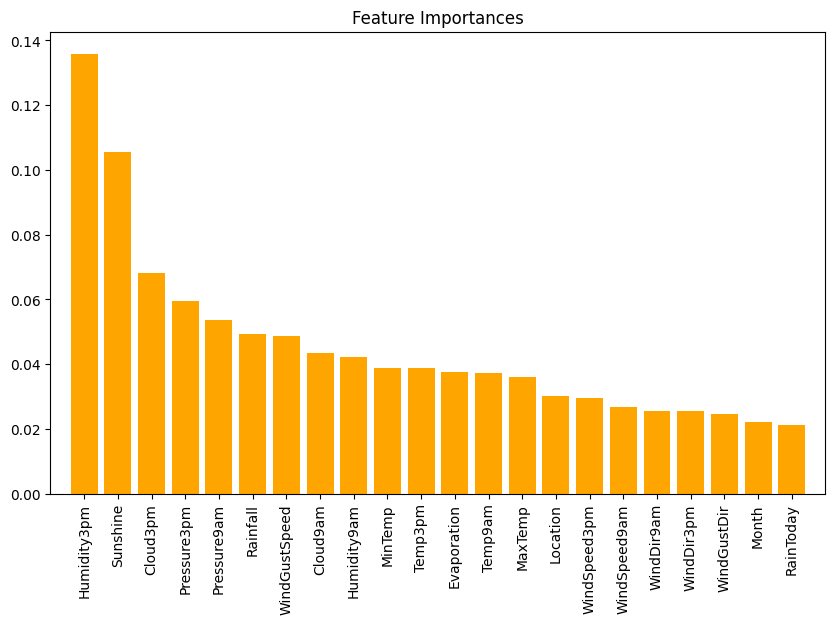

In [67]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(x.shape[1]), feature_importances[indices], align='center', color='orange')
plt.xticks(range(x.shape[1]), x.columns[indices], rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()


__XG Boost__

In [68]:
import xgboost as xgb

In [69]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:12:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[20850  1248]
 [ 2770  3571]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     22098
         1.0       0.74      0.56      0.64      6341

    accuracy                           0.86     28439
   macro avg       0.81      0.75      0.78     28439
weighted avg       0.85      0.86      0.85     28439

Accuracy: 0.8587151446956645


The XGB model achieved the highest accuracy at 85.9%, outperforming both Logistic Regression and Random Forest.

Further investigation and development are needed to enhance the model's predictive performance.